In [ ]:
#mounting drive with colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PetImagesC'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/PetImagesC/Dog/394.jpg
/content/drive/MyDrive/PetImagesC/Dog/3916.jpg
/content/drive/MyDrive/PetImagesC/Dog/3905.jpg
/content/drive/MyDrive/PetImagesC/Dog/3915.jpg
/content/drive/MyDrive/PetImagesC/Dog/3914.jpg
/content/drive/MyDrive/PetImagesC/Dog/3923.jpg
/content/drive/MyDrive/PetImagesC/Dog/3904.jpg
/content/drive/MyDrive/PetImagesC/Dog/3900.jpg
/content/drive/MyDrive/PetImagesC/Dog/391.jpg
/content/drive/MyDrive/PetImagesC/Dog/3903.jpg
/content/drive/MyDrive/PetImagesC/Dog/3936.jpg
/content/drive/MyDrive/PetImagesC/Dog/3918.jpg
/content/drive/MyDrive/PetImagesC/Dog/3945.jpg
/content/drive/MyDrive/PetImagesC/Dog/3924.jpg
/content/drive/MyDrive/PetImagesC/Dog/3940.jpg
/content/drive/MyDrive/PetImagesC/Dog/3922.jpg
/content/drive/MyDrive/PetImagesC/Dog/3906.jpg
/content/drive/MyDrive/PetImagesC/Dog/3921.jpg
/content/drive/MyDrive/PetImagesC/Dog/3913.jpg
/content/drive/MyDrive/PetImagesC/Dog/3917.jpg
/content/dr

In [ ]:
!ls '/content/drive/MyDrive/PetImagesC'

Cat  Dog


In [ ]:
ds_dir = '/content/drive/MyDrive/PetImagesC'

In [ ]:
import tensorflow as tf
batch_size = 64
img_height = 150
img_width =150
ds_pet = tf.keras.preprocessing.image_dataset_from_directory(ds_dir)

Found 23449 files belonging to 2 classes.


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(ds_dir, validation_split=0.2, subset='training', seed=123, image_size=(img_height,img_width), batch_size=batch_size)

Found 23449 files belonging to 2 classes.
Using 18760 files for training.


In [ ]:
vaild_ds = tf.keras.preprocessing.image_dataset_from_directory(ds_dir, validation_split=0.2, subset='validation', seed=123, image_size=(img_height,img_width), batch_size=batch_size)

Found 23449 files belonging to 2 classes.
Using 4689 files for validation.


In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = tf.keras.models. Sequential([ tf.keras.layers.Conv2D(filters=5, kernel_size=3, activation='relu', input_shape=[150,150,3]),
tf.keras.layers. MaxPooling2D(2, 2), tf.keras.layers. Conv2D(filters=32, kernel_size=3, activation= 'relu'),

tf.keras.layers.MaxPooling2D(2,2), tf.keras.layers.Conv2D (filters=64, kernel_size=3, activation='relu'),

tf.keras.layers. MaxPooling2D(2,2), tf.keras.layers. Conv2D (filters=128, kernel_size=3, activation='relu'),

tf.keras.layers. MaxPooling2D(2,2), tf.keras.layers. Flatten(),

tf.keras.layers. Dense (units=512, activation='relu'),
tf.keras.layers. Dense (units=1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 5)       140       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        1472      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy', metrics =['acc'] )

In [ ]:
history=model.fit(train_ds, validation_data= vaild_ds, epochs=20)

Epoch 1/10
294/294 [==============================] - 4485s 15s/step - loss: 1.4165 - acc: 0.5390 - val_loss: 0.6720 - val_acc: 0.5728
Epoch 2/10
294/294 [==============================] - 47s 156ms/step - loss: 0.6723 - acc: 0.5723 - val_loss: 0.6444 - val_acc: 0.6276
Epoch 3/10
294/294 [==============================] - 47s 156ms/step - loss: 0.6428 - acc: 0.6320 - val_loss: 0.6337 - val_acc: 0.6571
Epoch 4/10
294/294 [==============================] - 46s 155ms/step - loss: 0.6005 - acc: 0.6770 - val_loss: 0.6036 - val_acc: 0.6735
Epoch 5/10
294/294 [==============================] - 47s 158ms/step - loss: 0.5449 - acc: 0.7249 - val_loss: 0.5438 - val_acc: 0.7228
Epoch 6/10
294/294 [==============================] - 46s 154ms/step - loss: 0.4699 - acc: 0.7735 - val_loss: 0.6352 - val_acc: 0.7115
Epoch 7/10
294/294 [==============================] - 46s 155ms/step - loss: 0.3766 - acc: 0.8289 - val_loss: 0.9675 - val_acc: 0.6765
Epoch 8/10
294/294 [==============================] - 4

In [ ]:
model.evaluate(vaild_ds)

74/74 [==============================] - 9s 108ms/step - loss: 0.8529 - acc: 0.7535


[0.8529424071311951, 0.7534655332565308]

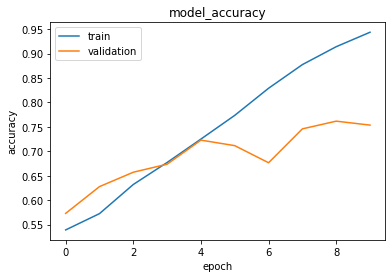

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='val_accuracy')
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

from keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
weights_file = '/content/drive/MyDrive/inception_v3_weights.h5'

In [ ]:
print(type(weights_file))
print(" ")
print(weights_file)

<class 'str'>
 
/content/drive/MyDrive/inception_v3_weights.h5


In [ ]:
#Save InceptionV3 model in model variable pre_trained_model
model_2 = InceptionV3(input_shape=(150,150,3),
                      include_top = False,
                          weights=None)
model_2


In [ ]:
model_2.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                       

In [ ]:
orig_weights = model_2.get_weights()
print(type(orig_weights))
print(" ")
print(len(orig_weights))

In [ ]:
len(model_2.layers)

311

In [ ]:

n_layers = 0
for layer in model_2.layers:
    print(layer)
    n_layers += 1

print(" ")
print("Total # layers of InceptionV3 Model are :", n_layers)

 
Total # layers of InceptionV3 Model are : 311


In [ ]:
model_2.layers[0]

In [ ]:
print("Layer Name ---> ", model_2.layers[0])
print(" ")
model_2.layers[0].get_weights()

Layer Name --->  <keras.engine.input_layer.InputLayer object at 0x7fe142065850>
 


[]

In [ ]:
# This is the 1st 'Hidden Layer'
#
print("Layer Name ---> ", model_2.layers[1])
print(" ")
model_2.layers[1].get_weights()
#
# same as
# pre_trained_model.get_weights()[0]

Layer Name --->  <keras.layers.convolutional.conv2d.Conv2D object at 0x7fe142065be0>
 


[array([[[[ 1.03995770e-01, -6.19164407e-02, -9.88413393e-03,
            5.14463633e-02, -6.31071702e-02, -1.04158983e-01,
            7.75663704e-02,  1.14418343e-01,  1.72998458e-02,
           -1.13213420e-01,  3.91830504e-02,  8.23873281e-03,
            1.31962761e-01,  8.04109871e-03,  7.96052217e-02,
           -7.46538565e-02, -4.35222089e-02,  8.92515779e-02,
            8.88970047e-02, -1.00151002e-01, -1.19389437e-01,
           -1.34216577e-01, -6.94516301e-03, -7.95717537e-02,
            3.58796269e-02, -9.33420882e-02,  5.02921343e-02,
            9.71286148e-02,  5.44321239e-02, -2.03945786e-02,
           -3.64309549e-03, -3.75701785e-02],
          [ 1.22771159e-01, -2.48179212e-02,  1.00299269e-01,
            2.30672508e-02,  7.48676360e-02,  8.07839036e-02,
            4.44290638e-02, -1.29620880e-02,  2.78031230e-02,
            5.79155684e-02, -9.76649374e-02,  6.13796562e-02,
            1.35228932e-02,  5.89900464e-02, -1.07887335e-01,
           -1.15635283e-

In [ ]:
len(model_2.layers[1].get_weights()[0])

3

In [ ]:
weight1 = model_2.layers[1].get_weights()
print(len(weight1))

1


In [ ]:
weight1_0 = np.array(weight1[0])
print(weight1_0.shape)

(3, 3, 3, 32)


In [ ]:
model_2.layers[1].get_weights()[0]

array([[[[ 1.03995770e-01, -6.19164407e-02, -9.88413393e-03,
           5.14463633e-02, -6.31071702e-02, -1.04158983e-01,
           7.75663704e-02,  1.14418343e-01,  1.72998458e-02,
          -1.13213420e-01,  3.91830504e-02,  8.23873281e-03,
           1.31962761e-01,  8.04109871e-03,  7.96052217e-02,
          -7.46538565e-02, -4.35222089e-02,  8.92515779e-02,
           8.88970047e-02, -1.00151002e-01, -1.19389437e-01,
          -1.34216577e-01, -6.94516301e-03, -7.95717537e-02,
           3.58796269e-02, -9.33420882e-02,  5.02921343e-02,
           9.71286148e-02,  5.44321239e-02, -2.03945786e-02,
          -3.64309549e-03, -3.75701785e-02],
         [ 1.22771159e-01, -2.48179212e-02,  1.00299269e-01,
           2.30672508e-02,  7.48676360e-02,  8.07839036e-02,
           4.44290638e-02, -1.29620880e-02,  2.78031230e-02,
           5.79155684e-02, -9.76649374e-02,  6.13796562e-02,
           1.35228932e-02,  5.89900464e-02, -1.07887335e-01,
          -1.15635283e-01,  2.97165066e-

In [ ]:
model_2.layers[1].get_weights()[0][0]

array([[[ 0.10399577, -0.06191644, -0.00988413,  0.05144636,
         -0.06310717, -0.10415898,  0.07756637,  0.11441834,
          0.01729985, -0.11321342,  0.03918305,  0.00823873,
          0.13196276,  0.0080411 ,  0.07960522, -0.07465386,
         -0.04352221,  0.08925158,  0.088897  , -0.100151  ,
         -0.11938944, -0.13421658, -0.00694516, -0.07957175,
          0.03587963, -0.09334209,  0.05029213,  0.09712861,
          0.05443212, -0.02039458, -0.0036431 , -0.03757018],
        [ 0.12277116, -0.02481792,  0.10029927,  0.02306725,
          0.07486764,  0.0807839 ,  0.04442906, -0.01296209,
          0.02780312,  0.05791557, -0.09766494,  0.06137966,
          0.01352289,  0.05899005, -0.10788734, -0.11563528,
          0.02971651,  0.08841586, -0.03614073,  0.02963187,
          0.02216092, -0.08890167,  0.0144694 ,  0.0168577 ,
          0.00824554, -0.08199336,  0.0673091 , -0.00417461,
         -0.05647308,  0.05962659,  0.05082841, -0.1026953 ],
        [-0.08624323, 

In [ ]:
model_2.layers[1].get_weights()[0][0][0]

array([[ 0.10399577, -0.06191644, -0.00988413,  0.05144636, -0.06310717,
        -0.10415898,  0.07756637,  0.11441834,  0.01729985, -0.11321342,
         0.03918305,  0.00823873,  0.13196276,  0.0080411 ,  0.07960522,
        -0.07465386, -0.04352221,  0.08925158,  0.088897  , -0.100151  ,
        -0.11938944, -0.13421658, -0.00694516, -0.07957175,  0.03587963,
        -0.09334209,  0.05029213,  0.09712861,  0.05443212, -0.02039458,
        -0.0036431 , -0.03757018],
       [ 0.12277116, -0.02481792,  0.10029927,  0.02306725,  0.07486764,
         0.0807839 ,  0.04442906, -0.01296209,  0.02780312,  0.05791557,
        -0.09766494,  0.06137966,  0.01352289,  0.05899005, -0.10788734,
        -0.11563528,  0.02971651,  0.08841586, -0.03614073,  0.02963187,
         0.02216092, -0.08890167,  0.0144694 ,  0.0168577 ,  0.00824554,
        -0.08199336,  0.0673091 , -0.00417461, -0.05647308,  0.05962659,
         0.05082841, -0.1026953 ],
       [-0.08624323,  0.04798369,  0.00452413,  0.0713

In [ ]:
model_2.layers[1].get_weights()[0][0][0][0]

array([ 0.10399577, -0.06191644, -0.00988413,  0.05144636, -0.06310717,
       -0.10415898,  0.07756637,  0.11441834,  0.01729985, -0.11321342,
        0.03918305,  0.00823873,  0.13196276,  0.0080411 ,  0.07960522,
       -0.07465386, -0.04352221,  0.08925158,  0.088897  , -0.100151  ,
       -0.11938944, -0.13421658, -0.00694516, -0.07957175,  0.03587963,
       -0.09334209,  0.05029213,  0.09712861,  0.05443212, -0.02039458,
       -0.0036431 , -0.03757018], dtype=float32)

In [ ]:
len(model_2.layers[1].get_weights()[0][0][0][0])

32

In [ ]:
len(model_2.layers[1].get_weights()[0][0][0][1])

32

In [ ]:
len(model_2.layers[1].get_weights()[0][0][0][2])

32

In [ ]:
model_2.get_weights()[0][0][0][0]

array([ 0.10399577, -0.06191644, -0.00988413,  0.05144636, -0.06310717,
       -0.10415898,  0.07756637,  0.11441834,  0.01729985, -0.11321342,
        0.03918305,  0.00823873,  0.13196276,  0.0080411 ,  0.07960522,
       -0.07465386, -0.04352221,  0.08925158,  0.088897  , -0.100151  ,
       -0.11938944, -0.13421658, -0.00694516, -0.07957175,  0.03587963,
       -0.09334209,  0.05029213,  0.09712861,  0.05443212, -0.02039458,
       -0.0036431 , -0.03757018], dtype=float32)

In [ ]:
model_2.get_weights()[0][0][0][1]

array([ 0.12277116, -0.02481792,  0.10029927,  0.02306725,  0.07486764,
        0.0807839 ,  0.04442906, -0.01296209,  0.02780312,  0.05791557,
       -0.09766494,  0.06137966,  0.01352289,  0.05899005, -0.10788734,
       -0.11563528,  0.02971651,  0.08841586, -0.03614073,  0.02963187,
        0.02216092, -0.08890167,  0.0144694 ,  0.0168577 ,  0.00824554,
       -0.08199336,  0.0673091 , -0.00417461, -0.05647308,  0.05962659,
        0.05082841, -0.1026953 ], dtype=float32)

In [ ]:
model_2.get_weights()[0][0][0][2]

array([-0.08624323,  0.04798369,  0.00452413,  0.07132122,  0.0336061 ,
       -0.03674924,  0.04817934,  0.04633209,  0.13375519, -0.11290345,
        0.04245758,  0.08006135, -0.0024319 ,  0.13668685,  0.05207621,
        0.11846413, -0.13591006, -0.06409372, -0.12103264, -0.04037631,
        0.07743935, -0.02717585,  0.12952854,  0.13243471,  0.00307395,
       -0.04763348, -0.0713504 ,  0.05905437,  0.1134036 , -0.10607253,
        0.10726586,  0.088204  ], dtype=float32)

In [ ]:
model_2.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                       

In [ ]:
model_2.load_weights(weights_file)

In [ ]:
model_2.get_weights()[0][0][0][2]

array([ 0.22171251, -0.00257035, -0.15950209, -0.02519428,  0.2439418 ,
        0.0255493 , -0.12879594,  0.13770443, -0.07870556,  0.04106485,
        0.02801192, -0.10753689,  0.04591163,  0.12724118,  0.19336733,
        0.01532905, -0.20063727,  0.22436142, -0.12913139, -0.09514879,
       -0.37000963,  0.2870322 , -0.08663153,  0.09281807, -0.02013109,
       -0.27207962,  0.04391272, -0.07557082, -0.09421882, -0.05933177,
        0.03962436, -0.6191185 ], dtype=float32)

In [ ]:
for layer in model_2.layers:
  layer.trainable = False
  
model_2.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                       

In [ ]:
LastLayer = model_2.get_layer('mixed7')
print('Last Layer shape is:', LastLayer.output_shape)
last_output = LastLayer.output

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

In [ ]:
x = layers.Dense  (1, activation='sigmoid')(x)           

model_3 = Model(model_2.input, x) 

In [ ]:
model_3.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                              

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import os

In [ ]:
base_dir = "/content/drive/MyDrive/cats_and_dogs_filtered"
#
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
#
print("train_dir path is : ", train_dir)
print(" ")
print("validation_dir path is : ", validation_dir)

train_dir path is :  /content/drive/MyDrive/cats_and_dogs_filtered/train
 
validation_dir path is :  /content/drive/MyDrive/cats_and_dogs_filtered/validation


In [ ]:
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures
#
print("validation_cats_dir path is : ", validation_cats_dir)
print(" ")
print("validation_dogs_dir path is : ", validation_dogs_dir)

validation_cats_dir path is :  /content/drive/MyDrive/cats_and_dogs_filtered/validation/cats
 
validation_dogs_dir path is :  /content/drive/MyDrive/cats_and_dogs_filtered/validation/dogs


In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
#
print("train_cats_dir path is : ", train_cats_dir)
print(" ")
print("train_dogs_dir path is : ", train_dogs_dir)

train_cats_dir path is :  /content/drive/MyDrive/cats_and_dogs_filtered/train/cats
 
train_dogs_dir path is :  /content/drive/MyDrive/cats_and_dogs_filtered/train/dogs


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

In [ ]:
history = model_3.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 2)

Epoch 1/10
100/100 - 1334s - loss: 0.3228 - acc: 0.8660 - val_loss: 0.1071 - val_acc: 0.9650 - 1334s/epoch - 13s/step
Epoch 2/10
100/100 - 21s - loss: 0.2228 - acc: 0.9170 - val_loss: 0.1401 - val_acc: 0.9450 - 21s/epoch - 215ms/step
Epoch 3/10
100/100 - 22s - loss: 0.1884 - acc: 0.9275 - val_loss: 0.1197 - val_acc: 0.9610 - 22s/epoch - 218ms/step
Epoch 4/10
100/100 - 22s - loss: 0.1766 - acc: 0.9320 - val_loss: 0.1070 - val_acc: 0.9630 - 22s/epoch - 217ms/step
Epoch 5/10
100/100 - 22s - loss: 0.1507 - acc: 0.9425 - val_loss: 0.1552 - val_acc: 0.9530 - 22s/epoch - 216ms/step
Epoch 6/10
100/100 - 22s - loss: 0.1736 - acc: 0.9350 - val_loss: 0.1238 - val_acc: 0.9660 - 22s/epoch - 216ms/step
Epoch 7/10
100/100 - 21s - loss: 0.1507 - acc: 0.9410 - val_loss: 0.1144 - val_acc: 0.9680 - 21s/epoch - 214ms/step
Epoch 8/10
100/100 - 21s - loss: 0.1562 - acc: 0.9405 - val_loss: 0.0994 - val_acc: 0.9740 - 21s/epoch - 214ms/step
Epoch 9/10
100/100 - 22s - loss: 0.1221 - acc: 0.9520 - val_loss: 0.17

In [ ]:
model_3.evaluate(validation_generator)

50/50 [==============================] - 5s 91ms/step - loss: 0.1070 - acc: 0.9660


[0.10697115957736969, 0.9660000205039978]

In [ ]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

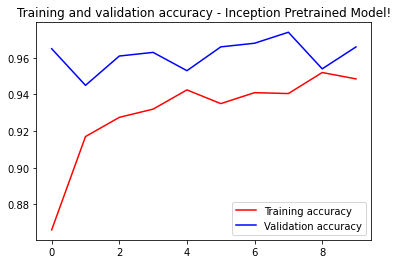

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - Inception Pretrained Model!')
plt.legend(loc=0)
plt.figure()


plt.show()